# Project 1 - Group 13 (Summer 20)
 -  Group Members: Shanshan Luo, Jicong Qiu

This Notebook contains 2 parts which Part A is `Regression` and Part B is `Classification`. Each Part includes `data preprocessing`, `model training` and `prediction`.
- For `Regression`, we will use the `kc_house_data.csv` dataset.
- For `Classification`, we will use the `telco_o.cvs` dataset. 

# Part A - Regression

For `regression` task, we use the `kc_house_data.csv` dataset and process with following steps:<br>
1. Data Preprocessing.
2. Regression Models Comparsion includes:
    - `KNN Regressor`, `Linear Regressor`, `Ridge`, `Lasso`, `Polynomial Regressor`, `Linear SVR & SVR with Linear kernel`, `SVR with Kernel RBF`, `SVR with Polynomial kernel`, `Decision Tree Regressor`. 
3. Using `Grid Search` to find the best scaling parameter.
4. Using `cross-validation` to find the average traing and testing score.
5. Find the best regressor and predict the target values for the test dataset.

## Data Preprocessing

- Import data and replace missing value

- Data Description:<br>

|No.|Variables | Description | Data Type |
|:--|:--------|:----------|:---------|
|1|id|A notation for a house| Numeric|
|2|date|Date house was sold|String|
|3|price| Price is prediction target| Numeric|
|4|bedrooms|Number of Bedrooms/House |Numeric|
|5|bathrooms|Number of bathrooms/bedrooms| Numeric|
|6|sqft_living| Square footage of the home |Numeric |
|7|sqft_lot| square footage of the lot| Numeric|
|8|floors| Total floors (levels) in house |Numeric|
|9|waterfront| House which has a view to a waterfront |Numeric|
|10|view| Has been viewed |String|
|11|condition |How good the condition is (Overall). 1 indicates worn out property and 5 excellent. |Numeric|
|12|grade |Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent. |Numeric|
|13|sqft_above| Square footage of house apart from basement |Numeric| 
|14|sqft_basement| square footage of the basement |Numeric|
|15|age| The aging of house|String|
|16|yr_renovated| Year when house was renovated |Numeric|
|17|zipcode| Zip |Numeric|
|18|lat| Latitude coordinate |Numeric|
|19|long| Longitude coordinate |Numeric|
|20|sqft_living15| Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |Numeric| 
|21|sqft_lot15| LotSize area in 2015(implies-- some renovations) |Numeric|

### 1.1 Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv("kc_house_data.csv")
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14633 non-null  int64  
 1   date           14633 non-null  object 
 2   price          14633 non-null  int64  
 3   bedrooms       14633 non-null  int64  
 4   bathrooms      14633 non-null  float64
 5   sqft_living    14633 non-null  int64  
 6   sqft_lot       14633 non-null  int64  
 7   floors         14633 non-null  float64
 8   waterfront     14633 non-null  int64  
 9   view           14633 non-null  object 
 10  condition      14633 non-null  int64  
 11  grade          14633 non-null  int64  
 12  sqft_above     14633 non-null  int64  
 13  sqft_basement  14633 non-null  int64  
 14  yr_built       14633 non-null  int64  
 15  yr_renovated   14633 non-null  object 
 16  zipcode        14633 non-null  int64  
 17  lat            14633 non-null  float64
 18  long  

In [3]:
house.shape

(14633, 21)

- The size of dataset is `14633` with `21` columns.

In [4]:
house['age'] = house['date'].apply(lambda x: int(x[:4])) - house['yr_built']
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14633 non-null  int64  
 1   date           14633 non-null  object 
 2   price          14633 non-null  int64  
 3   bedrooms       14633 non-null  int64  
 4   bathrooms      14633 non-null  float64
 5   sqft_living    14633 non-null  int64  
 6   sqft_lot       14633 non-null  int64  
 7   floors         14633 non-null  float64
 8   waterfront     14633 non-null  int64  
 9   view           14633 non-null  object 
 10  condition      14633 non-null  int64  
 11  grade          14633 non-null  int64  
 12  sqft_above     14633 non-null  int64  
 13  sqft_basement  14633 non-null  int64  
 14  yr_built       14633 non-null  int64  
 15  yr_renovated   14633 non-null  object 
 16  zipcode        14633 non-null  int64  
 17  lat            14633 non-null  float64
 18  long  

In [5]:
house[house == 0].all()

id                True
date              True
price             True
bedrooms         False
bathrooms        False
sqft_living       True
sqft_lot          True
floors            True
waterfront       False
view              True
condition         True
grade             True
sqft_above        True
sqft_basement    False
yr_built          True
yr_renovated      True
zipcode           True
lat               True
long              True
sqft_living15     True
sqft_lot15        True
age              False
dtype: bool

- The columns contains 0 are: <b>bedrooms, bathrooms, waterfront, sqft_basement, yr_renovated</b>. Since normal house has at lease 1 bedroom and bathroom, `0 badroom/bathroom` is equal to `missing value` in this dataset.

In [6]:
house['bedrooms'] = house['bedrooms'].replace(0, np.nan)
house['bathrooms'] = house['bathrooms'].replace(0, np.nan)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14633 non-null  int64  
 1   date           14633 non-null  object 
 2   price          14633 non-null  int64  
 3   bedrooms       14624 non-null  float64
 4   bathrooms      13776 non-null  float64
 5   sqft_living    14633 non-null  int64  
 6   sqft_lot       14633 non-null  int64  
 7   floors         14633 non-null  float64
 8   waterfront     14633 non-null  int64  
 9   view           14633 non-null  object 
 10  condition      14633 non-null  int64  
 11  grade          14633 non-null  int64  
 12  sqft_above     14633 non-null  int64  
 13  sqft_basement  14633 non-null  int64  
 14  yr_built       14633 non-null  int64  
 15  yr_renovated   14633 non-null  object 
 16  zipcode        14633 non-null  int64  
 17  lat            14633 non-null  float64
 18  long  

In [8]:
house[house.isnull().any(axis = 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
5,5100401414,20140502T000000,490000,2.0,NaN,880,6380,1.0,0,Seldom,...,880,0,1938,1994,98115,47.6924,-122.322,1340,6380,76
11,4217401055,20140502T000000,1400000,4.0,NaN,2920,4000,1.5,0,Seldom,...,1910,1010,1909,No,98105,47.6578,-122.280,2470,4000,105
25,5101405331,20140502T000000,495000,4.0,NaN,1600,6380,1.0,0,Seldom,...,1130,470,1959,No,98125,47.7010,-122.306,1090,6380,55
29,1024069009,20140502T000000,675000,5.0,NaN,2820,67518,2.0,0,Seldom,...,2820,0,1979,No,98029,47.5794,-122.025,2820,48351,35
37,587550340,20140502T000000,604000,3.0,NaN,3240,33151,2.0,0,Normal,...,3240,0,1995,No,98023,47.3256,-122.378,4050,24967,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14569,2422049104,20141230T000000,235000,2.0,NaN,830,9000,1.0,0,Seldom,...,830,0,1939,No,98032,47.3813,-122.243,1160,7680,75
14584,8685500145,20141230T000000,350000,3.0,NaN,1920,6710,1.0,0,Seldom,...,1320,600,1959,No,98118,47.5346,-122.286,1810,5600,55
14598,3321069006,20141231T000000,905000,3.0,NaN,3520,237402,2.5,0,Seldom,...,3520,0,2004,No,98092,47.2687,-122.056,2310,165963,10
14604,8093600065,20141231T000000,205000,4.0,NaN,1030,6621,1.0,0,Seldom,...,1030,0,1955,No,98055,47.4857,-122.221,1420,6631,59


In [9]:
print(round(house.isnull().sum() * 100 / len(house),2))

id               0.00
date             0.00
price            0.00
bedrooms         0.06
bathrooms        5.86
sqft_living      0.00
sqft_lot         0.00
floors           0.00
waterfront       0.00
view             0.00
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    0.00
yr_built         0.00
yr_renovated     0.00
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
age              0.00
dtype: float64


### 1.2 Replace NaN Value with Mean Value

In [10]:
house['bedrooms'].fillna((house['bedrooms'].mean()), inplace=True)
house['bathrooms'].fillna((house['bathrooms'].mean()), inplace=True)

In [11]:
house[house.isnull().any(axis = 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age


In [12]:
house['last_renovated'] = pd.DataFrame({'last_renovated': list(map(lambda a, b, r: a if r=='No' else a-int(r)+b, house['age'], house['yr_built'], house['yr_renovated']))})
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,last_renovated
0,1999700045,20140502T000000,313000,3.0,1.50,1340,7912,1.5,0,Seldom,...,0,1955,No,98133,47.7658,-122.339,1480,7940,59,59
1,1860600135,20140502T000000,2380000,5.0,2.50,3650,9050,2.0,0,Popular,...,280,1921,No,98119,47.6345,-122.367,2880,5400,93,93
2,5467900070,20140502T000000,342000,3.0,2.00,1930,11947,1.0,0,Seldom,...,0,1966,No,98042,47.3672,-122.151,2200,12825,48,48
3,4040800810,20140502T000000,420000,3.0,2.25,2000,8030,1.0,0,Seldom,...,1000,1963,No,98008,47.6188,-122.114,2070,8250,51,51
4,7197300105,20140502T000000,550000,4.0,2.50,1940,10500,1.0,0,Seldom,...,800,1976,No,98052,47.6830,-122.114,2200,10500,38,38


### 1.3 Drop Irrelavent Columns

Since this dataset is only the house trading record in 2014, the `date` column is irrelevant. <br>
Also, both `age` and `yr_renovated` indicate the age of house and some houses have not been renovated, so we decide to drop `yr_renovated`.
- The following columns are dropped since irrelevant:
    - `id`, `date`, `zipcode`, `yr_renovated`.

In [13]:
house.drop(['id','date','zipcode','yr_renovated'], axis=1, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           14633 non-null  int64  
 1   bedrooms        14633 non-null  float64
 2   bathrooms       14633 non-null  float64
 3   sqft_living     14633 non-null  int64  
 4   sqft_lot        14633 non-null  int64  
 5   floors          14633 non-null  float64
 6   waterfront      14633 non-null  int64  
 7   view            14633 non-null  object 
 8   condition       14633 non-null  int64  
 9   grade           14633 non-null  int64  
 10  sqft_above      14633 non-null  int64  
 11  sqft_basement   14633 non-null  int64  
 12  yr_built        14633 non-null  int64  
 13  lat             14633 non-null  float64
 14  long            14633 non-null  float64
 15  sqft_living15   14633 non-null  int64  
 16  sqft_lot15      14633 non-null  int64  
 17  age             14633 non-null 

### 1.4 Convert Categorical Columns to Numeric

In [14]:
print("'view' column includes value:",house['view'].unique())

'view' column includes value: ['Seldom' 'Popular' 'Normal']


In [15]:
house['view'] = house['view'].map({'Seldom':0, 'Normal':1, 'Popular':2}).astype(int)

In [16]:
print("'view' column includes value:",house['view'].unique())
print("'age' column includes value:", house['age'].unique())

'view' column includes value: [0 2 1]
'age' column includes value: [ 59  93  48  51  38  76  25  29  69  66 105  34  75  49  58  27  17  31
  91  60   9  23  55  94  35  63  47  10   0  19  70  22  57  36  40  64
  24  65  46  37  18  13  14  85   8   7   6   5   2   1  28  41  26 114
  86  32  45  61  54  11  16  72 106  56  43  52  39  53  90 112  15  20
  84  30   4 102  67  98  74  44  62  50  88 109 111  71  21  68 104 110
  33 108  92   3  12  97 101 100  77  89  82  96  42  73 103  95  78  87
  83 113 107  99  -1  79  81  80]


In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           14633 non-null  int64  
 1   bedrooms        14633 non-null  float64
 2   bathrooms       14633 non-null  float64
 3   sqft_living     14633 non-null  int64  
 4   sqft_lot        14633 non-null  int64  
 5   floors          14633 non-null  float64
 6   waterfront      14633 non-null  int64  
 7   view            14633 non-null  int64  
 8   condition       14633 non-null  int64  
 9   grade           14633 non-null  int64  
 10  sqft_above      14633 non-null  int64  
 11  sqft_basement   14633 non-null  int64  
 12  yr_built        14633 non-null  int64  
 13  lat             14633 non-null  float64
 14  long            14633 non-null  float64
 15  sqft_living15   14633 non-null  int64  
 16  sqft_lot15      14633 non-null  int64  
 17  age             14633 non-null 

### 1.5 Split Dataset into Train and Test Datasets

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(house, test_size=0.2, random_state=0)
print(train.shape)
print(test.shape)

(11706, 19)
(2927, 19)


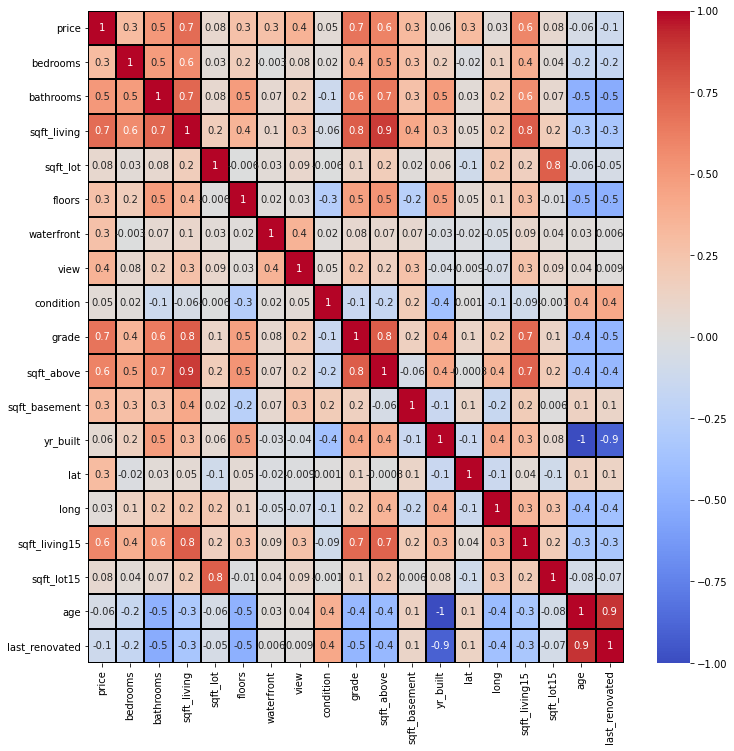

In [19]:
import seaborn as sbn

plt.figure(figsize=(12, 12))
sbn.heatmap(train.corr(), annot=True, fmt='.1g', cmap='coolwarm', linewidths=1, linecolor='black')

In [20]:
train_x = train.iloc[:,1:]
train_y = train[['price']]

train_x_train, train_x_eval, train_y_target, eval_y_target = train_test_split(train_x, train_y, random_state=0)
print('x train dataset shape:',train_x_train.shape)
print('x validation dataset shape:',train_x_eval.shape)

test_x = test.iloc[:,1:]
print('x test dataset shape:',test_x.shape)
test_y = test[['price']]

x train dataset shape: (8779, 18)
x validation dataset shape: (2927, 18)
x test dataset shape: (2927, 18)


- The target column, y is <b>price</b>, and other feature columns are x.

### 1.6 Apply Feature Scaler

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
#sc = MinMaxScaler()
train_x_scaled = sc.fit_transform(train_x_train)
eval_x_scaled = sc.transform(train_x_eval)
test_x_scaled = sc.transform(test_x)

## Regression Models

### Model1 - KNN Regressor

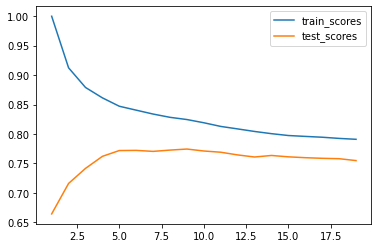

In [22]:
from sklearn.neighbors import KNeighborsRegressor

train_scores = []
test_scores = []
for k in range(1, 20):
    knn = KNeighborsRegressor(k)
    knn.fit(train_x_scaled, train_y_target)
    train_scores.append(knn.score(train_x_scaled, train_y_target))
    test_scores.append(knn.score(eval_x_scaled, eval_y_target))

scores = pd.DataFrame({'train_scores':train_scores, 'test_scores':test_scores}, index=range(1,20))
scores.plot()

In [23]:
train_scores = [round(i,4) for i in train_scores]
test_scores = [round(i,4) for i in test_scores]
print("train scores list", train_scores)
print("\ntest scors list:", test_scores)

train scores list [0.9998, 0.9123, 0.879, 0.8613, 0.8471, 0.8404, 0.8338, 0.8282, 0.8245, 0.819, 0.8128, 0.8086, 0.8043, 0.8005, 0.7974, 0.7959, 0.7945, 0.7925, 0.791]

test scors list: [0.6643, 0.716, 0.7415, 0.762, 0.7719, 0.7722, 0.7705, 0.7726, 0.7744, 0.7711, 0.769, 0.7644, 0.7609, 0.7635, 0.7612, 0.7597, 0.7587, 0.758, 0.7548]


- When `k=0`, the best `test score` is 0.7689 and `train score` is 0.8217.

### Model2 - Linear Regression Model using Normal Equation

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_x_scaled, train_y_target)
train_score = lr.score(train_x_scaled, train_y_target)
eval_score = lr.score(eval_x_scaled, eval_y_target)
print('Train score: ',round(train_score,4))
print('Test score: ',round(eval_score,4))
print('Coefficients: \n',lr.coef_)

Train score:  0.6977
Test score:  0.7014
Coefficients: 
 [[-23732.19391342  16502.84463479  74130.07650802   4804.50652369
    8377.25320808  51756.91922524  33525.36256221  22135.89515958
  119082.54068063  66498.05503623  28136.49338931 -42158.26651832
   74296.87516497 -13879.22437283  22888.19539554 -11930.44986661
   42158.26651832 -17251.6574436 ]]


### Cross-Validation

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, train_x_scaled , train_y_target, cv=5)
scores_list = [round(i,4) for i in scores]

print("Cross-validation scores: {}".format(scores_list))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Cross-validation scores: [0.703, 0.6885, 0.6889, 0.6977, 0.6977]
Average cross-validation score: 0.6951


- When `folds = 5`, the average cross-validation score is `0.6772`.

### Model3 - Ridge Model

- Grid Search for the best parameter.

Best score on validation set: 0.7014
Best parameters:  0.01
Test set score with best parameters: 0.6988
        train_scores  eval_scores
0.01        0.697725     0.701360
0.10        0.697725     0.701359
1.00        0.697725     0.701354
10.00       0.697725     0.701301
100.00      0.697669     0.700754


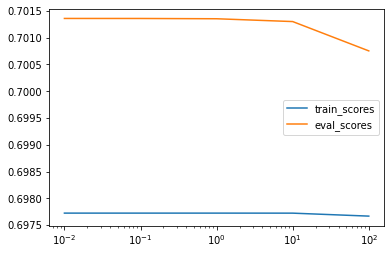

In [26]:
from sklearn.linear_model import Ridge

alphas = [0.01, 0.1, 1, 10, 100]
best_score = 0
train_scores = []
eval_scores = []
for a in alphas:
    lrrg = Ridge(a)
    lrrg.fit(train_x_scaled, train_y_target)
    score = lrrg.score(eval_x_scaled, eval_y_target)
    train_scores.append(lrrg.score(train_x_scaled, train_y_target))
    eval_scores.append(lrrg.score(eval_x_scaled, eval_y_target))
    if score > best_score:
        best_score = score
        best_parameters = a
    
lrrg = Ridge(best_parameters)
lrrg.fit(train_x_scaled, train_y_target)
test_score = lrrg.score(test_x_scaled, test_y)
print("Best score on validation set: {:.4f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.4f}".format(test_score))    
    
scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=alphas)
print(scores)
scores.plot(logx=True)

- With the best parameters: `alpha = 0.01`, the best score on validation set is `0.6824` and best test set score is `0.6828`.

### Model4 - Lasso Model

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25638136395044.188, tolerance: 106571715958.71654
  positive)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25638914780473.125, tolerance: 106571715958.71654
  positive)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25646622974438.5, tolerance: 106571715958.71654
  positive)
/usr/local/Cellar/

Best score on validation set: 0.7014
Best parameters:  10
Test set score with best parameters: 0.6989
        train_scores  eval_scores
0.01        0.697725     0.701360
0.10        0.697725     0.701360
1.00        0.697725     0.701361
10.00       0.697725     0.701361
100.00      0.697722     0.701289


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9714125749437.0, tolerance: 106571715958.71654
  positive)


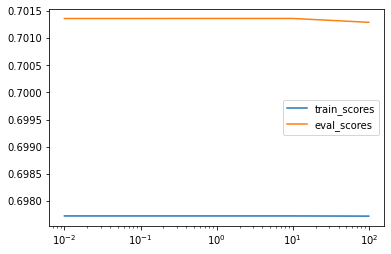

In [27]:
from sklearn.linear_model import Lasso

alpha_range = [0.01, 0.1, 1, 10, 100]
best_score_la = 0
train_scores = []
eval_scores = []
for alpha in alpha_range: 
    lasso = Lasso(alpha)
    lasso.fit(train_x_scaled, train_y_target)
    train_scores.append(lasso.score(train_x_scaled, train_y_target))
    eval_scores.append(lasso.score(eval_x_scaled, eval_y_target))
    score_la = lasso.score(eval_x_scaled, eval_y_target)
    if score_la > best_score_la:
        best_score_la = score_la
        best_parameters_la = alpha
    
lasso = Lasso(best_parameters_la)
lasso.fit(train_x_scaled , train_y_target)
test_score_la = lasso.score(test_x_scaled, test_y)
print("Best score on validation set: {:.4f}".format(best_score_la))
print("Best parameters: ", best_parameters_la)
print("Test set score with best parameters: {:.4f}".format(test_score_la))    
    
scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=alpha_range)
print(scores)
scores.plot(logx=True)

- With the best parameters: `alpha = 10`, the best score on validation set is `0.6824` and best test set score is `0.6828`.

### Model5 - Polynomial

   train_scores  eval_scores
1      0.697725      0.70136
2      0.813106      0.82428


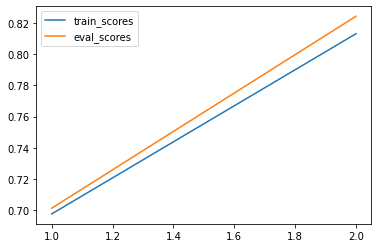

In [28]:
from  sklearn.preprocessing  import PolynomialFeatures

train_scores=[]
eval_scores=[]

for n in range(1,3):
    poly = PolynomialFeatures(n)
    x_train_poly = poly.fit_transform(train_x_scaled)
    x_eval_poly = poly.transform(eval_x_scaled)
    
    lr.fit(x_train_poly, train_y_target)
    train_scores.append(lr.score(x_train_poly, train_y_target))
    eval_scores.append(lr.score(x_eval_poly, eval_y_target))
    
scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=range(1,3))
print(scores)
scores.plot()

- When `n = 2`, the best `train score` is 0.8035 and `test score` is 08045.

### Model6 - Linear SVR & SVR with Linear kernel

In [29]:
from sklearn.svm import LinearSVR, SVR
sc_y = StandardScaler()
train_y_scaled = sc_y.fit_transform(train_y_target)
eval_y_scaled = sc_y.transform(eval_y_target)
test_y_scaled = sc_y.transform(test_y)

In [101]:
from sklearn.svm import LinearSVR, SVR
lsvr_scores = 0

for c in [0.01, 0.1, 1, 10, 100]:
    lsvr = LinearSVR(C=c)
    lsvr.fit(train_x_scaled, train_y_scaled.ravel())
    score = lsvr.score(eval_x_scaled, eval_y_scaled.ravel())
    if score > lsvr_scores:
            lsvr_score = score
            best_parameters = c
            
lsvr = LinearSVR(C=best_parameters)
lsvr.fit(train_x_scaled, train_y_scaled.ravel())
test_score = lsvr.score(test_x_scaled, test_y_scaled.ravel())
print("Best score on validation set: {:.2f}".format(lsvr_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best score on validation set: 0.53
Best parameters:  100
Test set score with best parameters: 0.56


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [102]:
svrlk_scores = 0

#for c in [0.01, 0.1, 1, 10, 100]: 
for c in [1, 10, 100]:
    svrlk = SVR(kernel='linear', C=c)
    svrlk.fit(train_x_scaled, train_y_scaled.ravel())
    score = svrlk.score(eval_x_scaled, eval_y_scaled.ravel())
    if score > svrlk_scores:
            svrlk_score = score
            best_parameters = c
            
svrlk = SVR(kernel = 'linear', C = best_parameters)
svrlk.fit(train_x_scaled, train_y_scaled.ravel())
test_score = svrlk.score(test_x_scaled, test_y_scaled.ravel())
print("\nBest score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on validation set: 0.85
Best parameters:  100
Test set score with best parameters: 0.64


- For `Linear SVR`, when `c = 100`, the best train score is `0.64` and test score is `0.45`.<br>
- For `SVR with Linear Kernel `, when `c = 100`, the best train score is `0.68` and test score is `0.64`.

### Model7 - SVR with Kernel RBF

In [32]:
best_score = 0

for gamma in [0.01, 0.1, 1, 10, 100]:
    for C in [0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        svr = SVR(kernel='rbf', gamma = gamma, C = C)
        svr.fit(train_x_scaled, train_y_scaled.ravel())
        score = svr.score(eval_x_scaled, eval_y_scaled.ravel())
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best parameters: ", best_parameters)

Best parameters:  {'C': 100, 'gamma': 0.01}


In [33]:
svr = SVR(kernel='rbf', **best_parameters)
svr.fit(train_x_scaled, train_y_scaled.ravel())

SVR(C=100, gamma=0.01)

In [34]:
test_score = svr.score(test_x_scaled, test_y_scaled.ravel())
train_score = svr.score(train_x_scaled, train_y_scaled.ravel())
eval_score = svr.score(eval_x_scaled, eval_y_scaled.ravel())

print('train_score:', round(train_score,4))
print('eval_score:', round(eval_score,4))
print('test_score:', round(test_score,4))

train_score: 0.8849
eval_score: 0.8518
test_score: 0.781


- When `c = 100, gamma = 0.01`, the best score on validation set is 0.84 and test set score is 0.79.

### Model8 - SVR with Polynomial kernel

       train_d2   eval_d2  train_d3   eval_d3
0.01   0.481613  0.552162  0.671255  0.665265
0.10   0.570267  0.617812  0.737494  0.618921
1.00   0.585025  0.612719  0.771347 -0.362641
10.00  0.586230  0.603602  0.788801 -0.588133


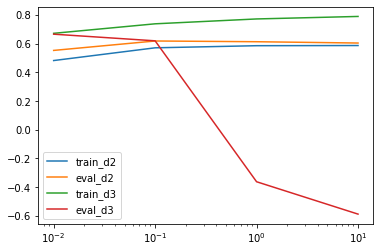

In [35]:
cs = [0.01, 0.1, 1, 10]
d2 = {'train':[], 'eval':[]}
d3 = {'train':[], 'eval':[]}

for c in cs:
    clf1 = SVR(kernel='poly', degree=2, C=c)
    clf2 = SVR(kernel='poly', degree=3, C=c)
        
    for clf, score in zip([clf1, clf2],
                         [d2, d3]):
        clf.fit(train_x_scaled, train_y_scaled.ravel())
        score['train'].append(clf.score(train_x_scaled, train_y_scaled.ravel()))
        score['eval'].append(clf.score(eval_x_scaled, eval_y_scaled.ravel()))

d2_scores = pd.DataFrame(d2, index=cs)
d3_scores = pd.DataFrame(d3, index=cs)
d2_scores.rename(columns={'train':'train_d2', 'eval':'eval_d2'}, inplace=True)
d3_scores.rename(columns={'train':'train_d3', 'eval':'eval_d3'}, inplace=True) 

scores = pd.concat([d2_scores, d3_scores], axis=1)
print(scores)
scores.plot(logx=True)

- When `degree = 3, c = 0.01`, the best train score is 0.66 and test score is 0.58.

### Model9 - Decision Tree Regressor

    train_scores  eval_scores
1       0.998518     0.727547
2       0.998518     0.727547
3       0.998518     0.727547
4       0.998518     0.727547
5       0.998518     0.727547
6       0.998518     0.727547
7       0.998518     0.727547
8       0.998518     0.727547
9       0.998518     0.727547
10      0.998518     0.727547
11      0.998518     0.727547
12      0.998518     0.727547
13      0.998518     0.727547
14      0.998518     0.727547
15      0.998518     0.727547
16      0.998518     0.727547
17      0.998518     0.727547
18      0.998518     0.727547
19      0.998518     0.727547


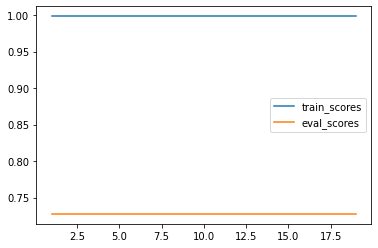

In [36]:
from sklearn.tree import DecisionTreeRegressor

max_depth = range(1, 20)
train_scores = []
eval_scores = []

for d in max_depth:
    dtree = DecisionTreeRegressor(max_depth=d)
    dtree.fit(train_x_train, train_y_target)
    train_scores = dtree.score(train_x_train, train_y_target)
    eval_scores = dtree.score(train_x_eval, eval_y_target)

scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=range(1,20))
print(scores)
scores.plot()

## Final Model - SVR with kernel rbf gamma=0.01 and C=100

In [37]:
svr = SVR(kernel = 'rbf', gamma = 0.01, C = 100)
svr.fit(eval_x_scaled, eval_y_scaled.ravel())
test_score = svr.score(test_x_scaled, test_y_scaled.ravel())
train_score = svr.score(train_x_scaled, train_y_scaled.ravel())
eval_score = svr.score(eval_x_scaled, eval_y_scaled.ravel())

print('train_score:', round(train_score,4))
print('eval_score:', round(eval_score,4))
print('test_score:', round(test_score,4))

train_score: 0.7986
eval_score: 0.9185
test_score: 0.8296


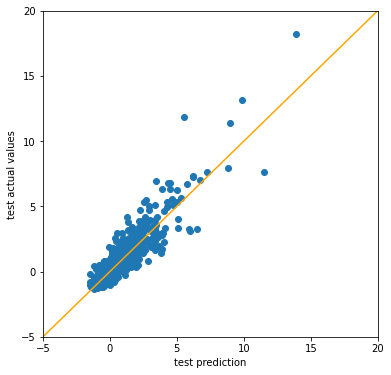

In [38]:
test_pred = svr.predict(test_x_scaled)
test_cmp = pd.DataFrame({'test_pred':test_pred, 'test_real':test_y_scaled.ravel()})

plt.figure(figsize=(6, 6))
plt.plot(test_cmp[['test_pred']], test_cmp[['test_real']], 'o')
plt.xlabel('test prediction')
plt.ylabel('test actual values')
plt.xlim(-5, 20)
plt.ylim(-5, 20)

x = x = np.linspace(-5, 20, 1000)
plt.plot(x, x, color='orange')
plt.show()

# Part B - Classification

For `classification` task, we use the `telco_o.csv` dataset and process with following steps:<br>
1. Data Preprocessing.
2. Regression Models Comparsion includes:
    - `KNN Regressor`, `Linear Regressor`, `Ridge`, `Lasso`, `Polynomial Regressor`, `Linear SVR & SVR with Linear kernel`, `SVR with Kernel RBF`, `SVR with Polynomial kernel`, `Decision Tree Regressor`. 
3. Using `Grid Search` to find the best scaling parameter.
4. Using `cross-validation` to find the average traing and testing score.
5. Find the best regressor and predict the target values for the test dataset.

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Data Preprocessing

### 1.1 Read in Dataset with missing value

|No|Variables|Description|
|:--|:--------|:-----------|
|1|customerID|Customer ID|
|2|gender|Whether the customer is a male or a female|
|3|SeniorCitizen|senior citizen or not (1, 0)|
|4|Dependents|Whether the customer has a partner or not (Yes, No)|
|5|tenure|Number of months the customer has stayed with the company|
|6|PhoneService| Whether the customer has a phone service or not (Yes, No)|
|7|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|8| InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|9| OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|10| OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|11| DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|12|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|13|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|14|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|15|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|16|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|17|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|18|MonthlyCharges|The amount charged to the customer monthly|
|19|TotalCharges|The total amount charged to the customer|
|20|Churn |Whether the customer churned or not (Yes or No)|

In [40]:
telco = pd.read_csv("telco_o.csv", na_values=['?', ' '])
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        6845 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  6761 non-null   object 
 13  TechSupport       6722 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [41]:
telco_na = telco.isnull().sum()
print(telco_na[telco_na>0])

Dependents          198
DeviceProtection    282
TechSupport         321
TotalCharges         11
dtype: int64


- Columns contains missing value are: `Dependents`, `DeviceProtecion`, `TechSupport`, `TotalCharges`.

## Prepare data set

### 1. Drop irrelevant column 
    - customerID

In [42]:
telco.drop(['customerID'], axis=1, inplace=True)

### 2. Fill missing value of each column 
    2.1 - Fill missing value with most frequent instance of values in each group
          - target columns : DeviceProtection, TechSupport

In [43]:
# Fill nan in column DeviceProtection according to the values in contract and multipleLines
grps = telco.groupby(['Contract', 'MultipleLines'])
telco['DeviceProtection'] = grps['DeviceProtection'].transform(lambda grp: grp.fillna(grp.value_counts().index[0]))

In [44]:
telco['TechSupport'].unique()

array(['No', 'Yes', nan, 'No internet service'], dtype=object)

In [45]:
grps = telco.groupby(['MultipleLines'])
telco['TechSupport'] = grps['TechSupport'].transform(lambda grp: grp.fillna(grp.value_counts().index[0]))

### 2. Fill missing value of each column
    2.2 - Drop all the rows with missing value in column Dependents  

In [46]:
telco.dropna(inplace=True)
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6834 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6834 non-null   int64  
 1   gender            6834 non-null   object 
 2   SeniorCitizen     6834 non-null   int64  
 3   Partner           6834 non-null   object 
 4   Dependents        6834 non-null   object 
 5   tenure            6834 non-null   int64  
 6   PhoneService      6834 non-null   object 
 7   MultipleLines     6834 non-null   object 
 8   InternetService   6834 non-null   object 
 9   OnlineSecurity    6834 non-null   object 
 10  OnlineBackup      6834 non-null   object 
 11  DeviceProtection  6834 non-null   object 
 12  TechSupport       6834 non-null   object 
 13  StreamingTV       6834 non-null   object 
 14  StreamingMovies   6834 non-null   object 
 15  Contract          6834 non-null   object 
 16  PaperlessBilling  6834 non-null   object 


### 3. Convert columns from Object type to Numeric type
    3.1 - Mapping categorical values to {0, 1}
          Columns:[Churn],[gender],[Partner],[PhoneService],[PaperlessBilling],[Dependents]
    3.2 - Mapping categorical values to {0, 1, 2}
          Columns:[MultipleLines],[OnlineSecurity],[OnlineBackup],[StreamingMovies],[DeviceProtection],[TechSupport]
    3.3 - Adding dummy variables
          Columns:[InternetService],[StreamingTV],[StreamingMovies],[Contract],[PaymentMethod]

In [47]:
# Convert data type of the column Churn to int
telco['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
telco["Churn"] = telco["Churn"].map({"No":0, "Yes":1}).astype(int)
telco.head(5)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [49]:
telco['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [50]:
telco['gender'] = telco['gender'].map({"Female": 0, "Male":1}).astype(int)

In [51]:
telco["gender"].head(5)

0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int64

In [52]:
telco["Partner"] = telco["Partner"].map({"Yes": 1, "No": 0}).astype(int)
telco.head(5)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,1,0,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,2,1,0,0,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,3,1,0,0,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,4,0,0,0,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [53]:
telco['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [54]:
telco['PhoneService'] = telco['PhoneService'].map({"Yes":1, "No":0}).astype(int)
telco['PhoneService'].head(5)

0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int64

In [55]:
telco["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [56]:
telco["MultipleLines"] = telco["MultipleLines"].map({"No phone service":0, "No":1, "Yes":2}).astype(int)
telco["MultipleLines"].head(5)

0    0
1    1
2    1
3    0
4    1
Name: MultipleLines, dtype: int64

In [57]:
telco["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [58]:
telco["OnlineSecurity"] = telco["OnlineSecurity"].map({"No internet service":0, "No":1, "Yes":2}).astype(int)
telco["OnlineSecurity"].head(5)

0    1
1    2
2    2
3    2
4    1
Name: OnlineSecurity, dtype: int64

In [59]:
telco["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [60]:
telco["OnlineBackup"] = telco["OnlineBackup"].map({"No internet service":0, "No":1, "Yes":2}).astype(int)
telco["OnlineBackup"].head(5)

0    2
1    1
2    2
3    1
4    1
Name: OnlineBackup, dtype: int64

In [61]:
telco["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [62]:
telco["StreamingMovies"] = telco["StreamingMovies"].map({"No internet service":0, "No":1, "Yes":2}).astype(int)
telco["StreamingMovies"].head(5)

0    1
1    1
2    1
3    1
4    1
Name: StreamingMovies, dtype: int64

In [63]:
telco["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [64]:
telco["PaperlessBilling"] = telco["PaperlessBilling"].map({"No":0, "Yes":1}).astype(int)
telco["PaperlessBilling"].head(5)

0    1
1    0
2    1
3    0
4    1
Name: PaperlessBilling, dtype: int64

In [65]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6834 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6834 non-null   int64  
 1   gender            6834 non-null   int64  
 2   SeniorCitizen     6834 non-null   int64  
 3   Partner           6834 non-null   int64  
 4   Dependents        6834 non-null   object 
 5   tenure            6834 non-null   int64  
 6   PhoneService      6834 non-null   int64  
 7   MultipleLines     6834 non-null   int64  
 8   InternetService   6834 non-null   object 
 9   OnlineSecurity    6834 non-null   int64  
 10  OnlineBackup      6834 non-null   int64  
 11  DeviceProtection  6834 non-null   object 
 12  TechSupport       6834 non-null   object 
 13  StreamingTV       6834 non-null   object 
 14  StreamingMovies   6834 non-null   int64  
 15  Contract          6834 non-null   object 
 16  PaperlessBilling  6834 non-null   int64  


In [66]:
telco['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [67]:
telco['DeviceProtection'] = telco['DeviceProtection'].map({'No internet service':0, "No":1, "Yes":2}).astype(int)
telco['DeviceProtection'].head(5)

0    1
1    2
2    1
3    2
4    1
Name: DeviceProtection, dtype: int64

In [68]:
telco['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [69]:
telco["Dependents"] = telco["Dependents"].map({"Yes": 1, "No": 0}, na_action='ignore').astype(int)
telco["Dependents"].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Dependents, dtype: int64

In [70]:
telco['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [71]:
telco['TechSupport'] = telco['TechSupport'].map({'No internet service':0, 'No':1, 'Yes':2}).astype(int)

In [72]:
telco["TechSupport"].head(5)

0    1
1    1
2    1
3    2
4    1
Name: TechSupport, dtype: int64

In [73]:
telco.loc[:, telco.dtypes==object].head(4)

,InternetService,StreamingTV,Contract,PaymentMethod
0,DSL,No,Month-to-month,Electronic check
1,DSL,No,One year,Mailed check
2,DSL,No,Month-to-month,Mailed check
3,DSL,No,One year,Bank transfer (automatic)


In [74]:
# add dummy variables for InternetService column
its_dummy = pd.get_dummies(telco['InternetService'], columns='InternetService', prefix='ITS') 
telco = pd.concat([telco, its_dummy], axis=1)


In [75]:
telco.drop(['InternetService'], axis=1, inplace=True)

In [76]:
stv_dummy = pd.get_dummies(telco['StreamingTV'], columns='StreamingTV', prefix='STV')
telco = pd.concat([telco, stv_dummy], axis=1)
telco.drop(['StreamingTV'], axis=1, inplace=True)

In [77]:
smv_dummy = pd.get_dummies(telco['StreamingMovies'], columns='StreamingMovies', prefix='SMV')
telco = pd.concat([telco, smv_dummy], axis=1)
telco.drop(['StreamingMovies'], axis=1, inplace=True)

In [78]:
con_dummy = pd.get_dummies(telco['Contract'], columns='Contract', prefix='CTRT')
telco = pd.concat([telco, con_dummy], axis=1)
telco.drop(['Contract'], axis=1, inplace=True)

In [79]:
payment_dummy = pd.get_dummies(telco['PaymentMethod'], columns='PaymentMethod', prefix='Payment')
telco = pd.concat([telco, payment_dummy], axis=1)
telco.drop(['PaymentMethod'], axis=1, inplace=True)

In [80]:
# convert interger-string column TotalCharge to int
pd.to_numeric(telco['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 6834, dtype: float64

In [81]:
##########################################
#Now we have a data frame without missing values and all features have numeric value type
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6834 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         6834 non-null   int64  
 1   gender                             6834 non-null   int64  
 2   SeniorCitizen                      6834 non-null   int64  
 3   Partner                            6834 non-null   int64  
 4   Dependents                         6834 non-null   int64  
 5   tenure                             6834 non-null   int64  
 6   PhoneService                       6834 non-null   int64  
 7   MultipleLines                      6834 non-null   int64  
 8   OnlineSecurity                     6834 non-null   int64  
 9   OnlineBackup                       6834 non-null   int64  
 10  DeviceProtection                   6834 non-null   int64  
 11  TechSupport                        6834 non-null   int64

### Split data set to train and test datasets

In [82]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(telco, test_size=0.2, random_state=0)
print(train.shape)
print(test.shape)

(5467, 32)
(1367, 32)


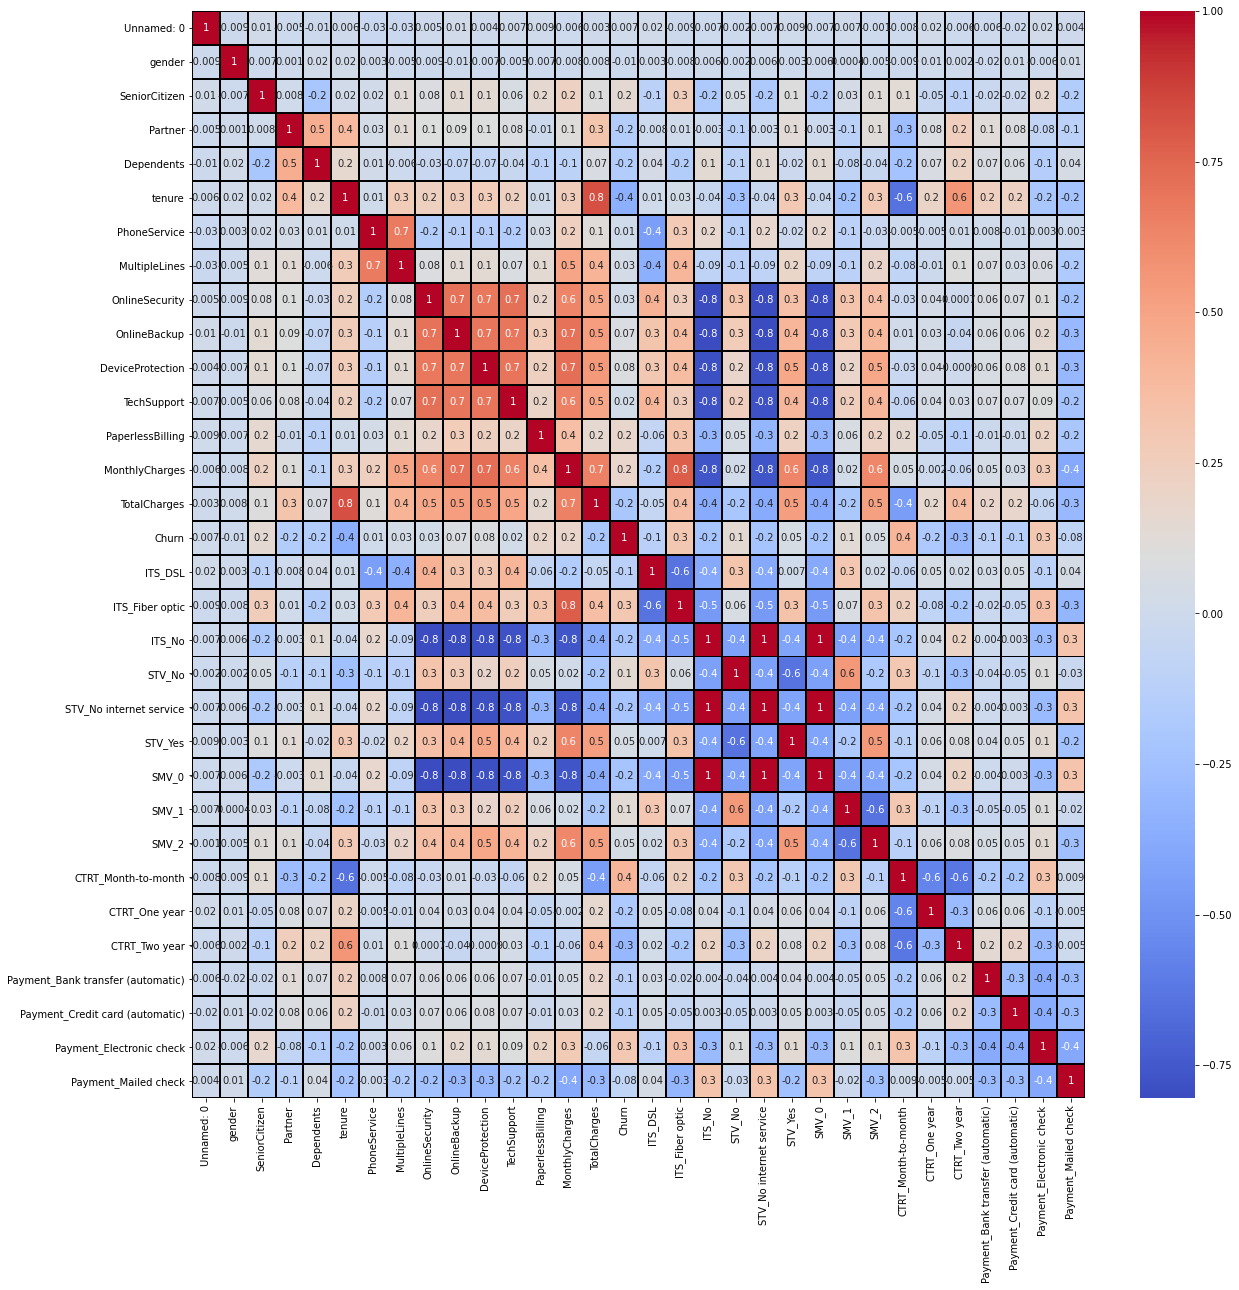

In [83]:
import seaborn as sbn

plt.figure(figsize=(20, 20))
sbn.heatmap(train.corr(), annot=True, fmt='.1g', cmap='coolwarm', linewidths=1, linecolor='black')

### Separate features and predict target

In [84]:
# separte features and targets in train dataset
train_y = train['Churn']
train_x = train.drop(['Churn'], axis=1)

# separate features and targets in test dataset
test_y = test['Churn']
test_x = test.drop(['Churn'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a5e53c8>,
      dtype=object)

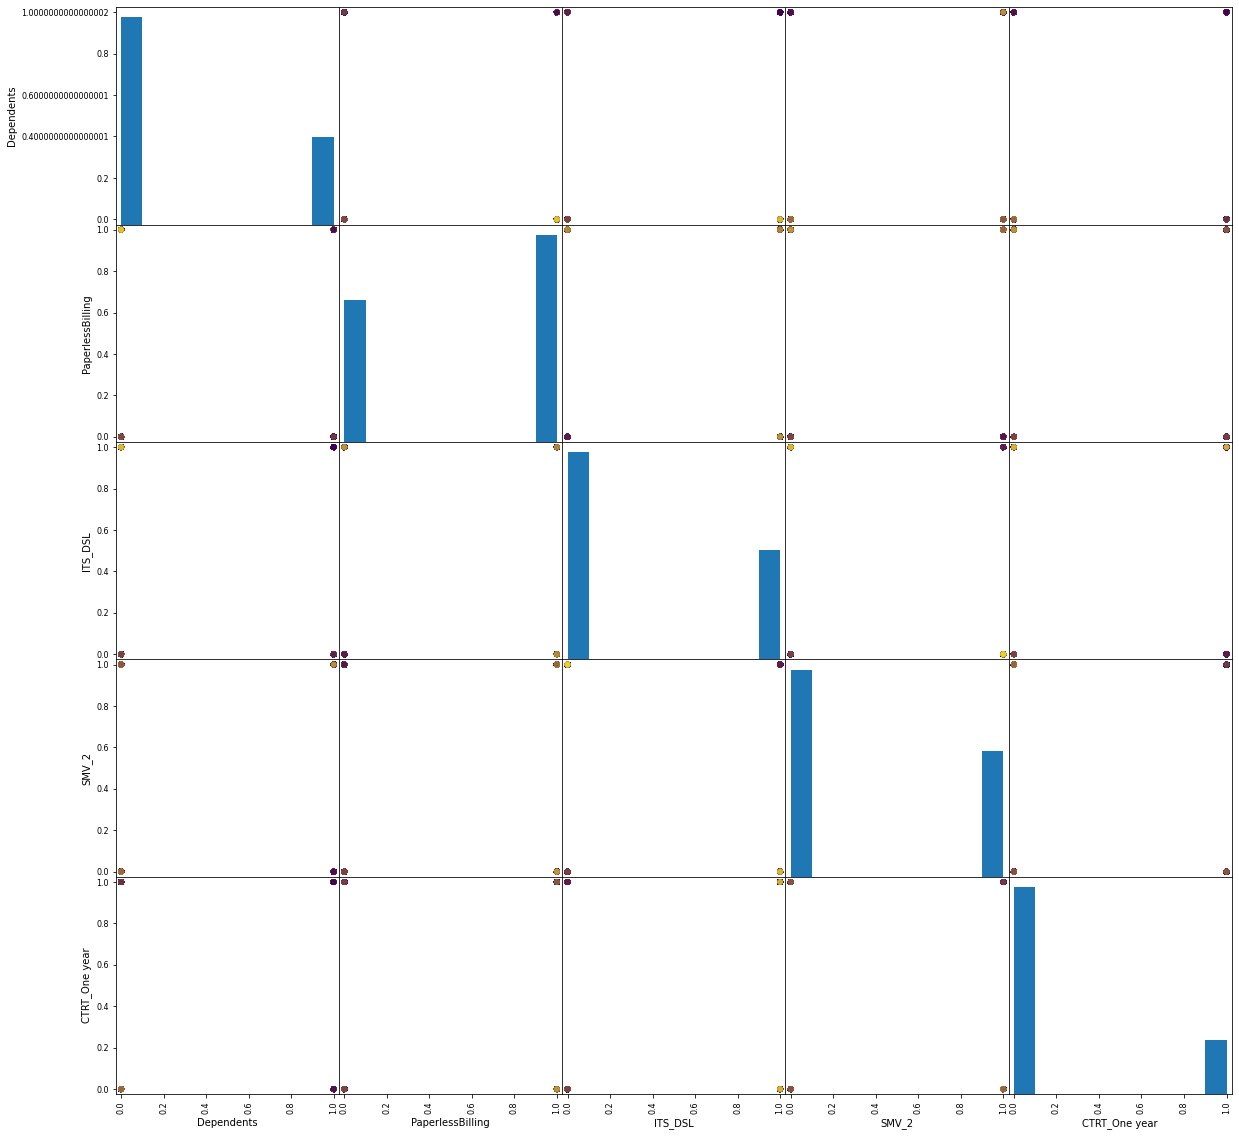

In [85]:
# coefs: 4, 12, 15, 23, 25
from pandas.plotting import scatter_matrix

scatter_matrix(train_x.iloc[:, [4, 12, 15, 23, 25]], figsize=(20, 20), c=train_y.values, alpha=0.5, marker='o')

### Separate train data set further to get train and validation data set

In [86]:
train_x_train,train_x_eval,y_train,y_eval = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

In [87]:
# Normalize features of both train and test datasets
sc = MinMaxScaler()
train_x_train_norm = sc.fit_transform(train_x_train)
train_x_eval_norm = sc.transform(train_x_eval)

test_x_norm = sc.transform(test_x)

## Classification Models

### Model1 - KNN 

In [88]:
train_scores = []
eval_scores = []
for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(train_x_train_norm, y_train)
    train_scores.append(knn.score(train_x_train_norm, y_train))
    eval_scores.append(knn.score(train_x_eval_norm, y_eval))

scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=range(1,20))
print(scores)

    train_scores  eval_scores
1       1.000000     0.702011
2       0.869315     0.735527
3       0.863304     0.730652
4       0.839258     0.739793
5       0.836905     0.733090
6       0.826973     0.747105
7       0.826451     0.749543
8       0.820700     0.753809
9       0.823053     0.761121
10      0.820439     0.762949
11      0.817303     0.759902
12      0.817041     0.765996
13      0.812859     0.764778
14      0.811814     0.768434
15      0.809462     0.764778
16      0.810768     0.769043
17      0.811814     0.767824
18      0.811553     0.774528
19      0.812075     0.770871


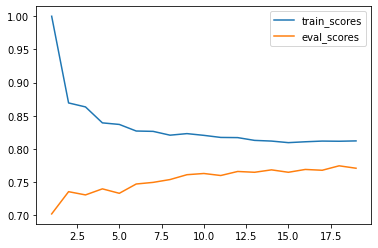

In [89]:
from scipy.interpolate import interp1d

scores.plot(kind='line')

### Model 2 - Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    logi_l1 = LogisticRegression(penalty='l1', C=c, solver="liblinear")
    logi_l2 = LogisticRegression(penalty='l2', C=c, solver='liblinear')

    logi_l1.fit(train_x_train_norm, y_train)
    logi_l2.fit(train_x_train_norm, y_train)

    train_score_l1.append(logi_l1.score(train_x_train_norm, y_train))
    train_score_l2.append(logi_l2.score(train_x_train_norm, y_train))

    test_score_l1.append(logi_l1.score(train_x_eval_norm, y_eval))
    test_score_l2.append(logi_l2.score(train_x_eval_norm, y_eval))

         train_score_l1  train_score_l2  test_score_l1  test_score_l2
0.001          0.738108        0.738108       0.726386       0.726386
0.010          0.778620        0.792473       0.777575       0.795856
0.100          0.806848        0.805280       0.800731       0.801341
1.000          0.807632        0.808677       0.798294       0.798294
10.000         0.810246        0.810507       0.796466       0.796466
100.000        0.810246        0.810507       0.796466       0.795856


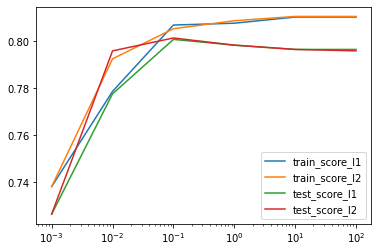

In [91]:
logi_scores = pd.DataFrame({
                            'train_score_l1': train_score_l1,
                            'train_score_l2': train_score_l2, 
                            'test_score_l1': test_score_l1, 
                            'test_score_l2': test_score_l2}, index=c_range)
print(logi_scores)
logi_scores.plot(logx=True)

- When `c= 0.1, penalty = l2`, the best train score is 0.806325 and test score is 0.801950.

### Model 3 - Softmax Regression

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


            train      eval
0.01     0.795086  0.801950
0.10     0.808939  0.799512
1.00     0.810768  0.796466
10.00    0.810246  0.796466
100.00   0.810507  0.795856
1000.00  0.810507  0.795856


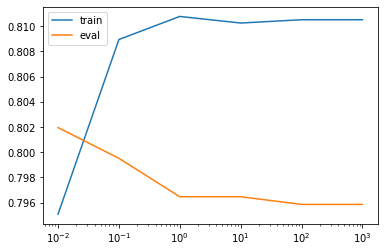

In [92]:
c_range = [0.01, 0.1, 1, 10, 100, 1000]

train_scores = []
eval_scores = []
for c in c_range:
    smr = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=c)
    smr.fit(train_x_train_norm, y_train)
    train_scores.append(smr.score(train_x_train_norm, y_train))
    eval_scores.append(smr.score(train_x_eval_norm, y_eval))
    
scores = pd.DataFrame({'train': train_scores, 'eval':eval_scores}, index=c_range)
scores.plot(logx=True)
print(scores)

- When `c=0.01`, the best train score is 0.7951 and test score is 0.802.

### Model4 - Linear SVM

      lsvm_train  lsvm_eval
0.01    0.807893   0.802559
0.10    0.809462   0.794028
1.00    0.809462   0.793419


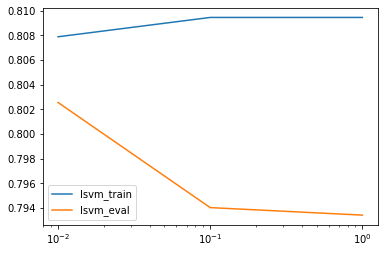

In [93]:
from sklearn.svm import SVC, LinearSVC

cs = [0.01, 0.1, 1]
lsvm_train_scores=[]
lsvm_eval_scores=[]

for c in cs:
    lsvm = LinearSVC(C=c)
    lsvm.fit(train_x_train_norm, y_train)
    lsvm_train_scores.append(lsvm.score(train_x_train_norm, y_train))
    lsvm_eval_scores.append(lsvm.score(train_x_eval_norm, y_eval))

lsvm_scores = pd.DataFrame({'lsvm_train': lsvm_train_scores, 'lsvm_eval':lsvm_eval_scores}, index=cs)
print(lsvm_scores)
lsvm_scores.plot(logx=True)

- When `c = 0.01`, the best train score is 0.8092 and test score is 0.8026.

### Model5 - SVM with Kernel Linear

      svmkl_train  svmkl_eval
0.01     0.797177    0.800731
0.10     0.800836    0.797684
1.00     0.802405    0.794637


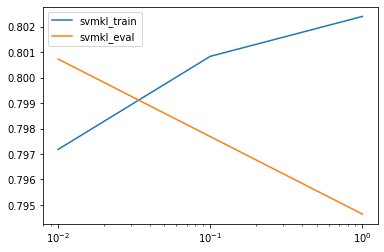

In [94]:
svmkl_train_scores=[]
svmkl_eval_scores=[]

for c in cs:
    svmkl = SVC(kernel='linear', C=c)
    svmkl.fit(train_x_train_norm, y_train)
    svmkl_train_scores.append(svmkl.score(train_x_train_norm, y_train))
    svmkl_eval_scores.append(svmkl.score(train_x_eval_norm, y_eval))

svmkl_scores = pd.DataFrame({'svmkl_train': svmkl_train_scores, 'svmkl_eval':svmkl_eval_scores}, index=cs)
svmkl_scores.plot(logx=True)
print(svmkl_scores)

- When `C=0.01`, the best train score is 0.7964 and test score is 0.8001.

### Model6 - SVM with Kernel RBF

        train_gamma0.01  eval_gamma0.01  train_gamma0.1  eval_gamma0.1  \
0.01           0.738108        0.726386        0.738108       0.726386   
0.10           0.738108        0.726386        0.795086       0.792809   
1.00           0.800836        0.797684        0.812598       0.797684   
10.00          0.805280        0.798294        0.842394       0.785497   
100.00         0.816780        0.793419        0.903816       0.748934   

        train_gamma1  eval_gamma1  train_gamma10  eval_gamma10  
0.01        0.738108     0.726386       0.738108      0.726386  
0.10        0.775484     0.765387       0.738108      0.726386  
1.00        0.900680     0.776356       0.970465      0.734918  
10.00       0.966545     0.748934       0.987977      0.733090  
100.00      0.981443     0.737355       0.994250      0.733699  


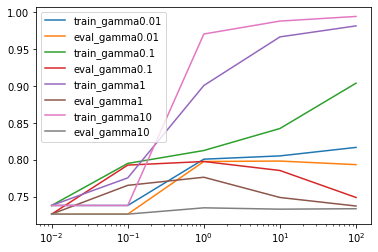

In [95]:
import matplotlib.gridspec as gridspec

cs = [0.01, 0.1, 1, 10, 100]

gamma1 = {'train':[], 'eval':[]}
gamma2 = {'train':[], 'eval':[]}
gamma3 = {'train':[], 'eval':[]}
gamma4 = {'train':[], 'eval':[]}

for c in cs:
    clf_gamma1 = SVC(kernel='rbf', gamma=0.01, C=c)
    clf_gamma2 = SVC(kernel='rbf', gamma=0.1, C=c)
    clf_gamma3 = SVC(kernel='rbf', gamma=1, C=c)
    clf_gamma4 = SVC(kernel='rbf', gamma=10, C=c)
    
    for clf, score in zip([clf_gamma1, clf_gamma2, clf_gamma3, clf_gamma4],
                            [gamma1, gamma2, gamma3, gamma4]):
        clf.fit(train_x_train_norm, y_train)
        score['train'].append(clf.score(train_x_train_norm, y_train))
        score['eval'].append(clf.score(train_x_eval_norm, y_eval))

gamma1_scores = pd.DataFrame(gamma1, index=cs)
gamma2_scores = pd.DataFrame(gamma2, index=cs)
gamma3_scores = pd.DataFrame(gamma3, index=cs)
gamma4_scores = pd.DataFrame(gamma4, index=cs)
gamma1_scores.rename(columns={'train':'train_gamma0.01', 'eval':'eval_gamma0.01'}, inplace=True)
gamma2_scores.rename(columns={'train':'train_gamma0.1', 'eval':'eval_gamma0.1'}, inplace=True)
gamma3_scores.rename(columns={'train':'train_gamma1', 'eval':'eval_gamma1'}, inplace=True)
gamma4_scores.rename(columns={'train':'train_gamma10', 'eval':'eval_gamma10'}, inplace=True)

scores = pd.concat([gamma1_scores, gamma2_scores, gamma3_scores, gamma4_scores], axis=1)
print(scores)
scores.plot(logx=True)

- When `c=1, gamma=0.1`, the best train score is 0.8110 and test score is 0.8001.

### Model7 - SVM with Kernel Polynomial

       train_d2   eval_d2  train_d3   eval_d3
0.01   0.740199  0.727605  0.781495  0.790372
0.10   0.801359  0.796466  0.803973  0.797075
1.00   0.814166  0.790372  0.829587  0.789153
10.00  0.825144  0.786106  0.875849  0.758684


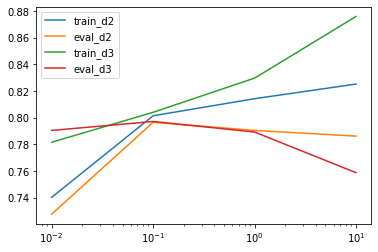

In [96]:
cs = [0.01, 0.1, 1, 10]
d2 = {'train':[], 'eval':[]}
d3 = {'train':[], 'eval':[]}

for c in cs:
    clf1 = SVC(kernel='poly', degree=2, C=c)
    clf2 = SVC(kernel='poly', degree=3, C=c)
        
    for clf, score in zip([clf1, clf2],
                         [d2, d3]):
        clf.fit(train_x_train_norm, y_train)
        score['train'].append(clf.score(train_x_train_norm, y_train))
        score['eval'].append(clf.score(train_x_eval_norm, y_eval))

d2_scores = pd.DataFrame(d2, index=cs)
d3_scores = pd.DataFrame(d3, index=cs)
d2_scores.rename(columns={'train':'train_d2', 'eval':'eval_d2'}, inplace=True)
d3_scores.rename(columns={'train':'train_d3', 'eval':'eval_d3'}, inplace=True) 

scores = pd.concat([d2_scores, d3_scores], axis=1)
print(scores)
scores.plot(logx=True)

- When `degree=3, c=0.1`, the best train score is 0.8035 and test score is  0.7983.

### Model8 - Decision Tree

    train_scores  eval_scores
1       0.738108     0.726386
2       0.764506     0.759293
3       0.792473     0.791590
4       0.800836     0.786106
5       0.806848     0.780622
6       0.816780     0.772090
7       0.833769     0.768434
8       0.849974     0.764778
9       0.872190     0.759902
10      0.897020     0.750152
11      0.918714     0.740402
12      0.937010     0.739183
13      0.954260     0.730043
14      0.969681     0.727605
15      0.980659     0.732480
16      0.988238     0.728215
17      0.992159     0.731871
18      0.995034     0.724558
19      0.996079     0.724558


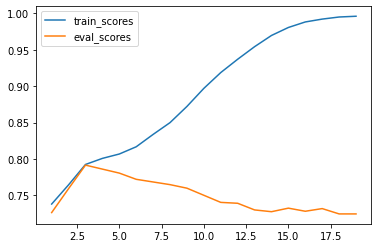

In [97]:
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1, 20)
train_scores = []
eval_scores = []
for d in max_depth:
    tr = DecisionTreeClassifier(max_depth=d, random_state=0)
    tr.fit(train_x_train, y_train)
    train_scores.append(tr.score(train_x_train, y_train))
    eval_scores.append(tr.score(train_x_eval, y_eval))
    
scores = pd.DataFrame({'train_scores':train_scores, 'eval_scores':eval_scores}, index=range(1,20))
print(scores)
scores.plot()

- When `depth=3`, the best train score is 0.7925 and test score is 0.7916.

In [98]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(train_x_train, y_train)
dtree.feature_importances_

array([0.00139689, 0.        , 0.        , 0.        , 0.        ,
       0.18776978, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01139371, 0.        ,
       0.        , 0.16130193, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.62911721,
       0.        , 0.00902049, 0.        , 0.        , 0.        ,
       0.        ])

- The coefficents is: 4, 12, 15, 23, 25

## Final Model - Linear SVM with C=0.01

In [99]:
from sklearn.metrics import plot_confusion_matrix

lsvm = LinearSVC(C=0.01)
lsvm.fit(train_x_train_norm, y_train)
train_score = lsvm.score(train_x_train_norm, y_train)
eval_score = lsvm.score(train_x_eval_norm, y_eval)
test_score = lsvm.score(test_x_norm, test_y)

print(train_score)
print(eval_score)
print(test_score)

0.8078933612127548
0.8025594149908593
0.7951719092904169


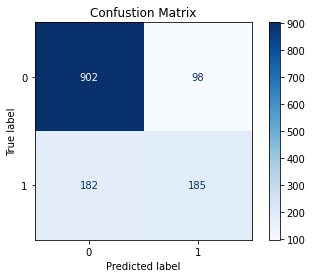

In [100]:
# plot cofusion matrix of test dataset
cm = plot_confusion_matrix(lsvm, test_x_norm, test_y,
                          display_labels=test_y.values,
                          cmap=plt.cm.Blues)
cm.ax_.set_title('Confustion Matrix')
plt.show()